# Logistic Regression in Python

# Logistic Regression in Python With scikit-learn: Example 1

Contoh pertama terkait dengan single-variate binary classification problem. Ini adalah jenis masalah klasifikasi yang paling jelas. Ada beberapa langkah umum yang harus kita ambil saat menyiapkan model klasifikasi:

1. Import packages, functions, and classes
2. Get data to work with and, if appropriate, transform it
3. Create a classification model and train (or fit) it with your existing data
4. Evaluate your model to see if its performance is satisfactory

Model yang cukup baik yang kita tentukan dapat digunakan untuk membuat prediksi lebih lanjut terkait dengan data baru yang tidak terlihat. Prosedur di atas sama untuk klasifikasi dan regresi.

Step 1: Import Packages, Functions, and Classes

Pertama, kita harus mengimpor Matplotlib untuk visualisasi dan NumPy untuk operasi array. Kita juga akan memerlukan LogisticRegression, classification_report(), dan confusion_matrix() dari scikit-learn:

In [1]:
# Import package
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression # untuk membuat model LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix # untuk Get Result

Step 2: Get Data In practice, you’ll usually have some data to work with. For the purpose of this example, let’s just create arrays for the input (𝑥) and output (𝑦) values:

In [2]:
# Provide input/predictor (x) and output/response (y)
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

Input dan output harus berupa array NumPy (instance kelas numpy.ndarray) atau objek serupa. numpy.arange() membuat array nilai yang berurutan dan berjarak sama dalam rentang tertentu.

Array x harus dua dimensi. Array x harus memiliki satu kolom untuk setiap masukan, dan jumlah baris harus sama dengan jumlah observations. Untuk membuat x dua dimensi, kita menerapkan .reshape() dengan argumen -1 untuk mendapatkan baris sebanyak yang diperlukan dan 1 untuk mendapatkan satu kolom. Beginilah tampilan x dan y sekarang:

In [3]:
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


x memiliki dua dimensi:

1. Satu kolom untuk satu masukan
2. Sepuluh baris, masing-masing sesuai dengan satu pengamatan

y adalah satu dimensi dengan sepuluh item. Sekali lagi, setiap item berhubungan dengan satu observasi. Ini hanya berisi nol dan satu karena ini adalah masalah klasifikasi biner.

Step 3: Create a Model and Train It

Setelah kita menyiapkan input dan output, kita dapat membuat dan menentukan model klasifikasi. Kita akan membuatnya dengan instance kelas LogisticRegression:

In [4]:
model = LogisticRegression(solver='liblinear', random_state=0)

Pernyataan di atas membuat instance LogisticRegression dan mengikat referensinya ke variabel model. LogisticRegression memiliki beberapa parameter opsional yang menentukan perilaku dan pendekatan model:

1. penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.
2. dual is a Boolean (False by default) that decides whether to use primal (when False) or dual formulation (when True).
3. tol is a floating-point number (0.0001 by default) that defines the tolerance for stopping the procedure.
4. C is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.
5. fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (when True) or consider it equal to zero (when False).
6. intercept_scaling is a floating-point number (1.0 by default) that defines the scaling of the intercept 𝑏₀.
7. class_weight is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.
8. random_state is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.
9. solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
10. max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.
11. multi_class is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.
12. verbose is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers.
13. warm_start is a Boolean (False by default) that decides whether to reuse the previously obtained solution.
14. n_jobs is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.
15. l1_ratio is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

Kita harus mencocokkan solver dan regularization dengan hati-hati karena beberapa alasan:

1. 'liblinear' solver doesn’t work without regularization.
2. 'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
3. 'saga' is the only solver that supports elastic-net regularization.

Setelah model dibuat, kita perlu menyesuaikan (atau melatih) model tersebut. Model fitting adalah proses menentukan koefisien 𝑏₀, 𝑏₁,…, 𝑏ᵣ yang sesuai dengan best value of the cost function. Kita melatih model dengan .fit():

In [5]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [6]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

Pada titik ini, kita telah membuat model klasifikasi.

Kita bisa dengan cepat mendapatkan atribut model kita. Misalnya, atribut .classes_ mewakili array nilai berbeda yang diambil y:

In [7]:
model.classes_

array([0, 1])

Ini adalah contoh klasifikasi biner, dan y bisa menjadi 0 atau 1, seperti yang ditunjukkan di atas.

Kita juga bisa mendapatkan nilai slope 𝑏₁ dan titik intercept 𝑏₀ dari linear function 𝑓 seperti ini:

In [9]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


Seperti yang kita lihat, 𝑏₀ diberikan di dalam array satu dimensi, sedangkan 𝑏₁ ada di dalam array dua dimensi. Kita menggunakan atribut .intercept_ dan .coef_ untuk mendapatkan hasil ini.

Step 4: Evaluate the Model

Setelah model ditentukan, kita dapat memeriksa performanya dengan .predict_proba(), yang mengembalikan matriks probabilitas bahwa keluaran yang diprediksi sama dengan nol atau satu:

In [10]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

Dalam matriks di atas, setiap baris sesuai dengan satu observasi. Kolom pertama adalah probabilitas keluaran yang diprediksi menjadi nol, yaitu 1 - 𝑝(𝑥). Kolom kedua adalah probabilitas yang outputnya satu, atau 𝑝(𝑥).

Kita bisa mendapatkan prediksi aktual, berdasarkan matriks probabilitas dan nilai 𝑝(𝑥), dengan .predict():

In [11]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

Fungsi ini mengembalikan nilai keluaran yang diprediksi sebagai one-dimensional array.

Gambar di bawah ini mengilustrasikan input, output, dan hasil klasifikasi:

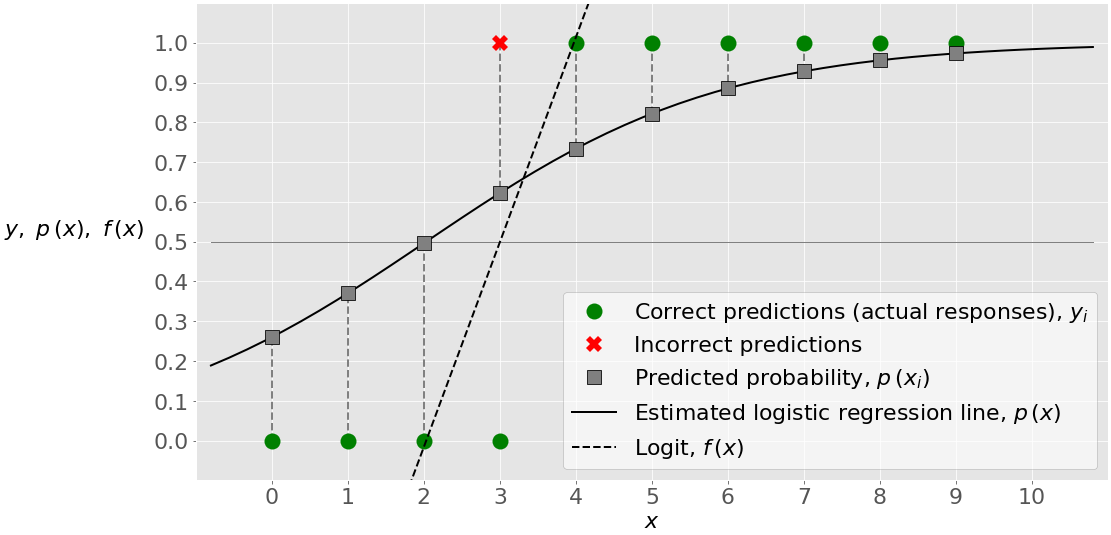

Lingkaran hijau mewakili actual responses prediksi yang benar. × merah menunjukkan prediksi yang salah. Garis hitam  adalah perkiraan logistic regression line 𝑝 (𝑥). Kotak abu-abu adalah titik-titik pada garis ini yang sesuai dengan 𝑥 dan nilai-nilai di kolom kedua dari matriks probabilitas. Garis putus-putus hitam adalah logit 𝑓(𝑥).

Nilai 𝑥 sedikit di atas 2 sesuai dengan threshold 𝑝 (𝑥) = 0,5, yaitu 𝑓 (𝑥) = 0. Nilai 𝑥 ini adalah batas antara titik yang diklasifikasikan sebagai nol dan yang diprediksi sebagai titik.

Misalnya, titik pertama memiliki masukan 𝑥 = 0, keluaran aktual 𝑦 = 0, probabilitas 𝑝 = 0,26, dan nilai prediksi 0. Titik kedua memiliki 𝑥 = 1, 𝑦 = 0, 𝑝 = 0,37, dan prediksi 0. Hanya poin keempat yang memiliki output aktual 𝑦 = 0 dan probabilitas lebih tinggi dari 0,5 (pada 𝑝 = 0,62), jadi salah diklasifikasikan sebagai 1. Semua nilai lainnya diprediksi dengan benar.

Jika kita memiliki sembilan dari sepuluh observasi yang diklasifikasikan dengan benar, akurasi model kita sama dengan 9/10 = 0,9, yang dapat kita peroleh dengan .score():

In [12]:
model.score(x, y)

0.9

.score() mengambil input dan output sebagai argumen dan mengembalikan rasio jumlah prediksi yang benar dengan jumlah observasi.

Kita bisa mendapatkan lebih banyak informasi tentang keakuratan model dengan confusion matrix. Dalam kasus klasifikasi biner, confusion matrix menunjukkan angka-angka berikut ini:

1. True negatives in the upper-left position
2. False negatives in the lower-left position
3. False positives in the upper-right position
4. True positives in the lower-right position

Untuk membuat confusion matrix, kita bisa menggunakan confusion_matrix() dan memberikan actual dan predicted outputs sebagai argumen:

In [13]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

1. Three true negative predictions: The first three observations are zeros predicted correctly.
2. No false negative predictions: These are the ones wrongly predicted as zeros.
3. One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.
4. Six true positive predictions: The last six observations are ones predicted correctly.

Seringkali berguna untuk memvisualisasikan confusion matrix. kita dapat melakukannya dengan .imshow() dari Matplotlib, yang menerima confusion matrix sebagai argumen:

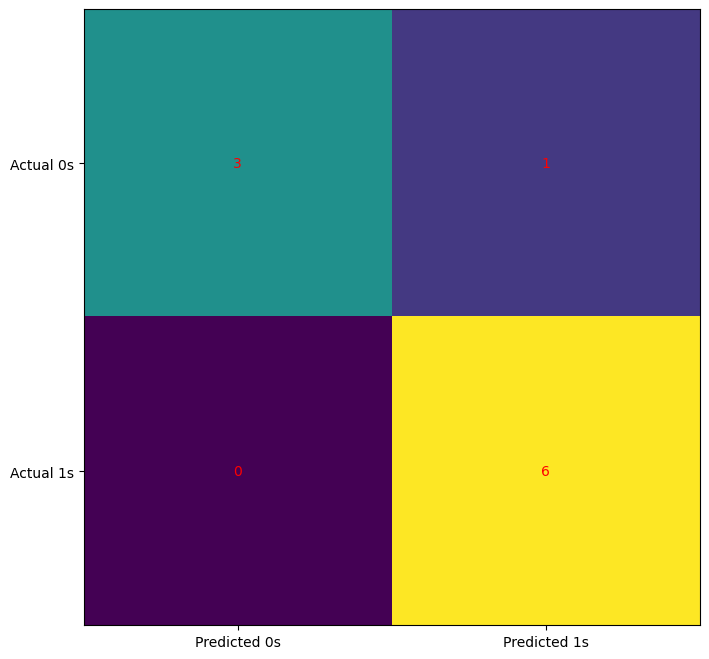

In [14]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Pada gambar ini, warna berbeda mewakili angka berbeda dan warna serupa mewakili angka serupa. Heatmaps adalah cara yang bagus untuk merepresentasikan matriks.

Kita bisa mendapatkan laporan yang lebih komprehensif tentang klasifikasi dengan classification_report():

In [15]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



Improve the Model

Kita dapat meningkatkan model  dengan mengatur parameter yang berbeda. Misalnya, mari bekerja dengan regularization strength C sama dengan 10,0, daripada nilai default 1,0:

In [16]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [17]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [18]:
print(model.predict_proba(x))

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [19]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


Seperti yang kita lihat, absolute values dari intercept  𝑏₀ dan coefficient 𝑏₁ lebih besar. Ini terjadi karena nilai C yang lebih besar berarti regularisasi yang lebih lemah, atau penalti yang lebih lemah terkait dengan nilai 𝑏₀ dan 𝑏₁ yang tinggi.

Nilai 𝑏₀ dan 𝑏₁ yang berbeda menyiratkan perubahan logit 𝑓(𝑥), nilai probabilitas 𝑝 (𝑥) yang berbeda, bentuk garis regresi yang berbeda, dan kemungkinan perubahan dalam hasil prediksi dan kinerja klasifikasi lainnya. Nilai batas 𝑥 yang mana 𝑝 (𝑥) = 0,5 dan 𝑓 (𝑥) = 0 sekarang lebih tinggi, di atas 3. Dalam hal ini, kita mendapatkan semua prediksi yang benar, seperti yang ditunjukkan oleh akurasi, confusion matrix, dan classification report:

In [20]:
model.score(x, y)

1.0

In [21]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [22]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Score (atau accuracy) 1 dan angka nol di kolom kiri bawah dan kanan atas dari confusion matrixmenunjukkan bahwa actual dan predicted outputs sama. Hal itu juga ditunjukkan dengan gambar di bawah ini:

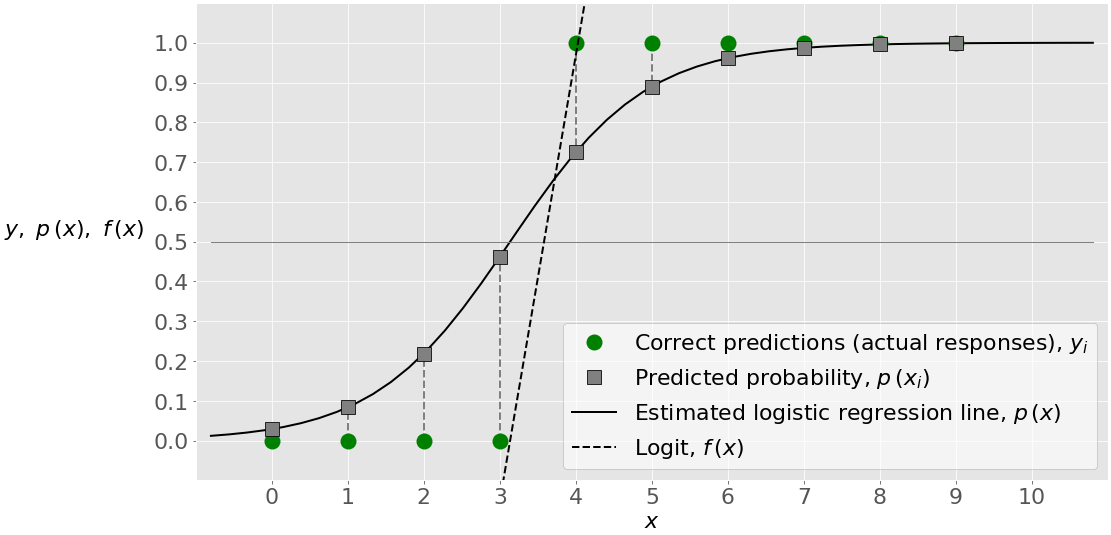

Gambar ini mengilustrasikan bahwa estimated regression line kini memiliki bentuk yang berbeda dan titik keempat diklasifikasikan dengan benar sebagai 0. Tidak ada tanda × merah, jadi tidak ada prediksi yang salah.

# Logistic Regression in Python: Handwriting Recognition

Contoh sebelumnya mengilustrasikan implementasi logistic regression dengan Python, serta beberapa detail terkait metode ini. Contoh berikutnya akan menunjukkan cara menggunakan logistic regression untuk memecahkan real-world classification problem. Pendekatannya sangat mirip dengan yang kita lihat, tetapi dengan kumpulan data yang lebih besar dan beberapa masalah tambahan.

Contoh ini adalah tentang image recognition. Untuk lebih tepatnya, kita akan bekerja pada recognition atas handwritten digits. Kita akan menggunakan kumpulan data dengan 1797 observasi, yang masing-masing berupa gambar dari satu digit tulisan tangan. Setiap gambar memiliki 64 px, dengan lebar 8 px dan tinggi 8 px.

Input (𝐱) adalah vektor dengan 64 dimensi atau nilai. Setiap vektor input menggambarkan satu gambar. Masing-masing dari 64 nilai mewakili satu piksel gambar. Nilai input adalah bilangan bulat antara 0 dan 16, bergantung pada shade of gray untuk piksel yang sesuai. Output (𝑦) untuk setiap observasi adalah bilangan bulat antara 0 dan 9, konsisten dengan digit pada gambar. Ada total sepuluh kelas, masing-masing sesuai dengan satu gambar.

Step 1: Import Packages

Kita perlu mengimpor Matplotlib, NumPy, dan beberapa fungsi dan kelas dari scikit-learn:

In [23]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Step 2a: Get Data

Kita bisa mengambil dataset langsung dari scikit-learn dengan load_digits(). Ini mengembalikan tuple input dan output:

In [24]:
x, y = load_digits(return_X_y=True)

In [26]:
x.shape

(1797, 64)

In [25]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


Itu adalah data yang kita dapatkan untuk dikerjakan. x adalah multi-dimensional array dengan 1797 baris dan 64 kolom. x berisi bilangan bulat dari 0 hingga 16. y adalahone-dimensional array dengan 1797 bilangan bulat antara 0 dan 9.

Step 2b: Split Data

Merupakan praktik yang baik dan diterapkan secara luas untuk membagi kumpulan data yang kita kerjakan menjadi dua subkumpulan. Subkumpulan tersebut adalah training set dan test set. Pembagian ini biasanya dilakukan secara acak. Kita harus menggunakan training set untuk melatih model kita . Setelah model dilatih, kita mengevaluasi kinerjanya dengan test set. Penting untuk tidak menggunakan test set dalam proses training model. Pendekatan ini memungkinkan evaluasi model yang tidak bias.

Salah satu cara untuk membagi set data kita menjadi training set dan test set adalah dengan menerapkan train_test_split():

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

train_test_split() menerima x dan y. train_test_split() juga membutuhkan test_size, yang menentukan ukuran test set, dan random_state untuk menentukan status pseudo-random number generator, serta argumen opsional lainnya. Fungsi ini mengembalikan list dengan empat array:

1. x_train: the part of x used to fit the model
2. x_test: the part of x used to evaluate the model
3. y_train: the part of y that corresponds to x_train
4. y_test: the part of y that corresponds to x_test

Setelah data kita terbagi, kita bisa menghiraukan x_test dan y_test sampai kita membuat model.

Step 2c: Scale Data

Standardization adalah proses mengubah data sedemikian rupa sehingga mean tiap kolom menjadi sama dengan nol, dan standard deviation tiap kolom adalah satu. Dengan cara ini, kita mendapatkan skala yang sama untuk semua kolom. Lakukan langkah-langkah berikut untuk menstandarkan data:

1. Calculate the mean and standard deviation for each column.
2. Subtract the corresponding mean from each element.
3. Divide the obtained difference by the corresponding standard deviation.

Merupakan praktik yang baik untuk standardize  data input yang kita gunakan untuk logistic regression, meskipun dalam banyak kasus hal itu tidak diperlukan. Standardization dapat meningkatkan kinerja algoritme kita. Ini membantu jika kita perlu compare dan interpret weights.

Kita bisa standardize input dengan membuat instance StandardScaler dan memanggil .fit_transform() di atasnya:

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

.fit_transform() menyesuaikan instance StandardScaler ke array yang diteruskan sebagai argumen, mengubah array ini, dan mengembalikan array standar yang baru. Sekarang, x_train adalah array input standardized.

Step 3: Create a Model and Train It

Langkah ini sangat mirip dengan contoh sebelumnya. Satu-satunya perbedaan adalah kita  menggunakan subset x_train dan y_train agar sesuai dengan model. Sekali lagi, kita harus membuat instance LogisticRegression dan memanggil .fit() di atasnya:

In [29]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

Step 4: Evaluate the Model

Kita harus mengevaluasi model seperti yang kita lakukan pada contoh sebelumnya, dengan perbedaan bahwa kita sebagian besar akan menggunakan x_test dan y_test, yang merupakan subkumpulan yang tidak diterapkan untuk training. Jika kita telah memutuskan untuk menstandarkan x_train, maka model yang diperoleh bergantung pada scaled data, jadi x_test harus diskalakan juga dengan instance StandardScaler yang sama:

In [30]:
x_test = scaler.transform(x_test)

Begitulah cara kita  mendapatkan x_test baru dengan skala yang tepat. Dalam kasus ini, kita menggunakan .transform(), yang hanya mengubah argumen, tanpa menyesuaikan scaler.

Kita bisa mendapatkan predicted outputs dengan .predict():

In [31]:
y_pred = model.predict(x_test)

Variabel y_pred sekarang terikat ke array predicted outputs. Perhatikan bahwa kita menggunakan x_test sebagai argumen di sini.

Kita bisa mendapatkan akurasi dengan .score():

In [32]:
model.score(x_train, y_train)

0.964509394572025

In [33]:
model.score(x_test, y_test)

0.9416666666666667

Sebenarnya, kita bisa mendapatkan dua nilai akurasi, satu diperoleh dengan training set dan lainnya dengan test set. Sebaiknya membandingkan keduanya, karena situasi di mana akurasi set pelatihan jauh lebih tinggi mungkin mengindikasikan overfitting. Akurasi set pengujian lebih relevan untuk mengevaluasi performa pada data yang tidak terlihat karena tidak bias.

Kita bisa mendapatkan confusion matrix dengan confusion_matrix():

In [34]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

Confusion matrix yang diperoleh berukuran besar. Dalam hal ini, ini memiliki 100 angka. Ini adalah situasi di mana mungkin sangat berguna untuk memvisualisasikannya:

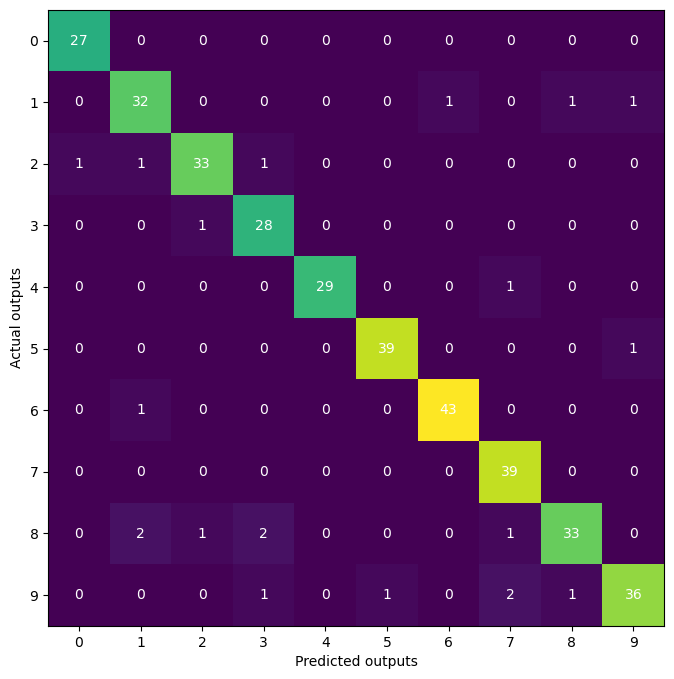

In [35]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

Ini adalah heatmap  yang menggambarkan confusion matrix dengan angka dan warna. Kita dapat melihat bahwa shades of purple menunjukkan angka kecil (seperti 0, 1, atau 2), sedangkan hijau dan kuning menunjukkan angka yang jauh lebih besar (27 ke atas).

Angka-angka pada diagonal utama (27, 32,…, 36) menunjukkan jumlah prediksi yang benar dari test set. Misalnya, ada 27 gambar dengan nol, 32 gambar satu, dan seterusnya yang diklasifikasikan dengan benar. Angka lain sesuai dengan prediksi yang salah. Misalnya, angka 1 di baris ketiga dan kolom pertama menunjukkan bahwa ada satu gambar dengan angka 2 yang salah diklasifikasikan sebagai 0.

Terakhir, kita bisa mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



# K-Nearest Neighbor (KNN)

KNN adalah algoritma non-parametric dan lazy learning algorithm. Non-parametric berarti tidak ada asumsi untuk distribusi data yang mendasarinya. Dengan kata lain, struktur model ditentukan dari dataset. Ini akan sangat membantu dalam praktik di mana sebagian besar kumpulan data dunia nyata tidak mengikuti asumsi teoretis matematis. Lazy algorithm berarti tidak memerlukan training data points untuk pembuatan model. Semua data pelatihan digunakan dalam tahap pengujian. Ini membuat pelatihan lebih cepat dan fase pengujian lebih lambat dan lebih mahal. Fase pengujian yang mahal artinya berdampak pada waktu dan memori. Dalam kasus terburuk, KNN membutuhkan lebih banyak waktu untuk memindai semua titik data dan memindai semua titik data akan membutuhkan lebih banyak memori untuk menyimpan data pelatihan.

# KNN in Python With scikit-learn: Example 1

Defining dataset

Mari pertama-tama buat dataset kita sendiri. Di sini kita membutuhkan dua jenis atribut atau kolom dalam data Anda: Feature dan label.

In [37]:
# Assigning features and label variables

# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

Encoding data columns

Berbagai machine learning algorithmsmemerlukan data input numerik, jadi kita perlu merepresentasikan kolom kategorikal dalam kolom numerik.

Untuk encode data ini, kita dapat memetakan setiap nilai menjadi sebuah angka. misalnya Overcast:0, Rainy:1, dan Sunny:2.

Proses ini dikenal sebagai label encoding, dan sklearn dengan mudah akan melakukannya untuk kita menggunakan Label Encoder.

In [41]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

# mendapatkan mapping hasil encode
weather_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(weather_mapping)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
{'Overcast': 0, 'Rainy': 1, 'Sunny': 2}


Di sini, kita  mengimpor modul preprocessing dan membuat objek Label Encoder. Dengan menggunakan objek LabelEncoder ini, kita dapat menyesuaikan dan mengubah kolom "weather" menjadi kolom numerik.

Demikian pula, kita dapat menyandikan temperature dan label ke dalam kolom numerik.

In [42]:
# converting string labels into numbers
temp_encoded=le.fit_transform(temp)

label=le.fit_transform(play)
print(temp_encoded)

# mendapatkan mapping hasil encode
play_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(play_mapping)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
{'No': 0, 'Yes': 1}


Combining Features

Di sini, kita akan menggabungkan beberapa kolom atau fitur menjadi satu set data menggunakan fungsi "zip"

In [40]:
#combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


Generating Model

Mari membangun classifier model KNN.

Pertama, impor modul KNeighboursClassifier dan buat classifier object KNN dengan meneruskan argumen jumlah tetangga dalam fungsi KNeighboursClassifier().

Kemudian, latih model kita dengan train set menggunakan fit() dan lakukan prediksi pada test set menggunakan predict().

In [43]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted = model.predict([[0,2]]) # 0:Overcast, 2:Mild

print(predicted)

[1]


Pada contoh di atas, kita memberikan input [0,2], di mana 0 berarti cuaca mendung/Overcast dan 2 berarti suhu sedang/Mild. Model memprediksi [1], yang artinya play.

# KNN in Python With scikit-learn: KNN with Multiple Labels

Hingga saat ini, kita telah mempelajari cara membuat pengklasifikasi KNN untuk dua kelas di python menggunakan scikit-learn. Sekarang kita akan belajar tentang KNN dengan banyak kelas.

Dalam model, kita dapat menggunakan wine dataset, yang merupakan masalah multi-class classification problem yang sangat terkenal. Data ini merupakan hasil analisis kimiawi wines yang ditanam di wilayah yang sama di Italia menggunakan tiga kultivar berbeda. Analisis menentukan jumlah 13 unsur yang ditemukan di masing-masing dari tiga jenis anggur.

Dataset terdiri dari 13 fitur ('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline') dan target (jenis kultivar).

Data ini memiliki tiga jenis kelas kultivar: 'class_0', 'class_1', dan 'class_2'. Di sini, kita dapat membuat model untuk mengklasifikasikan jenis kultivar. Dataset tersedia di pustaka scikit-learn, atau kita juga dapat mengunduhnya dari UCI Machine Learning Library.

Loading Data

Let's first load the required wine dataset from scikit-learn datasets.

In [44]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

Exploring Data

Setelah kita memuat set data, kita mungkin ingin tahu lebih banyak tentangnya. kita dapat memeriksa fitur dan nama target.

In [45]:
# print the names of the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [46]:
# print the label species(class_0, class_1, class_2)
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [47]:
# Mari kita periksa 5 record teratas dari set feature.

print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [48]:
# Mari kita periksa record set target.

print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [49]:
# Mari kita jelajahi lebih banyak lagi. Kita juga dapat memeriksa bentuk kumpulan data menggunakan shape.

# print data(feature)shape
print(wine.data.shape)

(178, 13)


In [50]:
# print target(or label)shape
print(wine.target.shape)

(178,)


Splitting Data

Untuk memahami performa model, membagi set data menjadi training set dan a test adalah strategi yang baik.

Mari kita pisahkan dataset dengan menggunakan function train_test_split(). Kita harus meneruskan 3 parameter yaitu features, target, dan test_set size. Selain itu, kita dapat menggunakan random_state untuk memilih record secara acak.

In [51]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) # 70% training and 30% test

Generating Model for K=5

Mari kita buat model pengklasifikasi KNN untuk k = 5.

In [53]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print(y_pred)

[2 0 0 0 0 1 1 2 1 1 0 1 0 1 0 0 0 2 2 2 1 1 0 1 2 0 2 0 2 2 0 0 1 2 0 1 0
 2 1 1 2 1 2 1 1 0 1 2 2 1 2 1 0 1]


Model Evaluation for k=5

Mari kita perkirakan, seberapa akurat pengklasifikasi atau model dapat memprediksi jenis kultivar.

Akurasi dapat dihitung dengan membandingkan actual test set values dan predicted values.

In [54]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


Kita mendapat tingkat klasifikasi 66.66%.

Untuk evaluasi lebih lanjut, kita juga dapat membuat model untuk jumlah K tetangga yang berbeda.



Re-generating Model for K=7

Mari kita buat model pengklasifikasi KNN untuk k = 7.

In [56]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print(y_pred)

[2 0 0 0 0 1 1 2 1 1 2 2 0 1 0 0 0 2 2 2 1 1 2 1 0 0 2 0 1 2 0 0 1 2 0 1 0
 2 1 1 2 1 2 1 1 0 1 2 2 2 0 1 0 2]


Mari kita estimasi lagi, seberapa akurat pengklasifikasi atau model dapat memprediksi jenis kultivar untuk k = 7.

In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7037037037037037


In [58]:
# Sekarang saatnya improve model dan mencari tahu nilai k yang optimal.

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

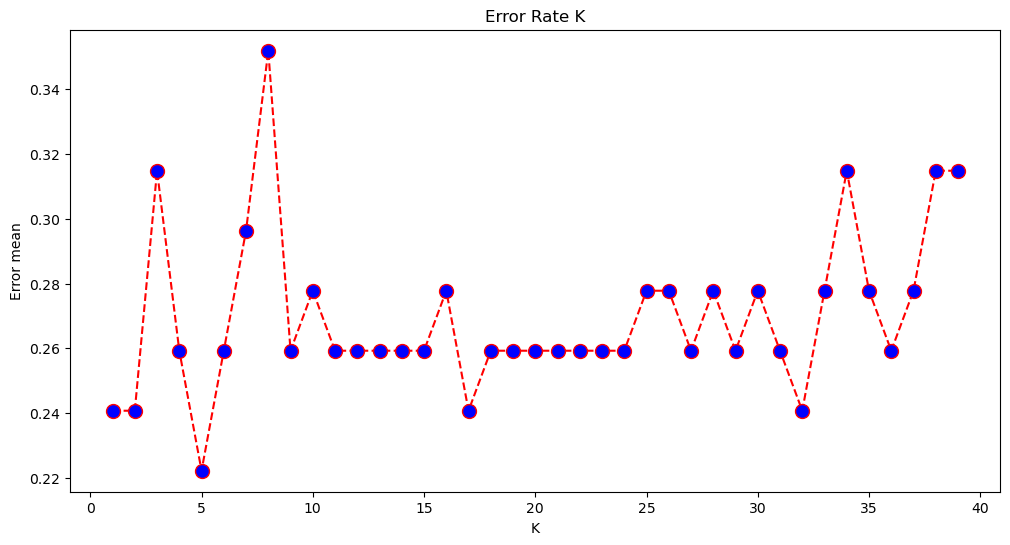

In [59]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [60]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=25)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222
